In [1]:
import pandas as pd
from os import listdir
from os.path import join
from tqdm import tqdm
from my_funcs import tokenize_es_a, tokenize_es_b, tokenize_es_c, tokenize_es_d 

In [2]:
folder = './datasets/'
for file in reversed(sorted(listdir(folder))): #nos uqedamos con el mas grande en caso de actualizar el ds
    if 'balanced' in file:
        print(f"ds_name = '{file}'")

ds_name = 'ds_semibalanced_1678_rs5150.csv'
ds_name = 'ds_balanced_gen_1678_rs5150.csv'
ds_name = 'ds_balanced_802_rs2.csv'
ds_name = 'ds_balanced_795_rs8008.csv'
ds_name = 'ds_balanced_795_rs2.csv'
ds_name = 'ds_balanced_795.csv'
ds_name = 'ds_balanced_1500_rs5150.csv'
ds_name = 'ds_balanced_1430_rs8008.csv'
ds_name = 'ds_balanced_1430_rs5150.csv'
ds_name = 'ds_balanced_1133_rs8008.csv'
ds_name = 'ds_balanced_1133_rs2.csv'


In [3]:
ds_name = 'ds_semibalanced_1678_rs5150.csv'
#ds_name = 'ds_balanced_1430_rs8008.csv' # el que se uso en la ultima ejecucion del logreg
#ds_name = 'ds_balanced_1500_rs5150.csv'
print('selected: ', ds_name)

selected:  ds_semibalanced_1678_rs5150.csv


In [4]:
df = pd.read_csv(join(folder, ds_name))
pd.set_option('display.max_colwidth', 200)
print(df.columns)
df[['title', 'content']].head()

Index(['id', 'title', 'content', 'category', 'url', 'text', 'index'], dtype='object')


,title,content
0,"Rusia responde a Alemania por caso Navalni: Denuncian ""acusaciones infundadas y ultimátums""","Rusia responde a Alemania por caso Navalni: Denuncian ""acusaciones infundadas y ultimátums"". Rusia criticó el miércoles ""las acusaciones infundadas y los ultimátums"" por parte de Alemania, en torn..."
1,La pandemia de coronavirus se acerca al millón de muertos en el mundo,"La pandemia de coronavirus se acerca al millón de muertos en el mundo. Nueve meses después de su irrupción en China, la pandemia de coronavirus se acercaba este domingo a la cifra simbólica de un ..."
2,Al menos siete muertos deja jornada de protestas contra la Policía en Colombia,Al menos siete muertos deja jornada de protestas contra la Policía en Colombia. Al menos siete personas murieron en la violenta jornada de protestas de anoche en Bogotá y otras ciudades de Colo...
3,Perú supera los 900 mil contagios de coronavirus,Perú supera los 900 mil contagios de coronavirus. Perú superó los 900 mil casos confirmados de coronavirus y registró una cifra de 34.411 fallecidos en el país. Según los datos suministrados por e...
4,Biden asume como el Presidente número 46 de EE.UU. y promete unir al país,"Biden asume como el Presidente número 46 de EE.UU. y promete unir al país. En un día soleado en Washington D.C, Joe Biden asumió como el Presidente número 46 de Estados Unidos y en su primer discu..."


In [5]:
MAX_LEN = 1400
DROPOUT = 0.65
MAX_VOCAB_SIZE = 50000
RANDOM_STATE = 8008
BATCH_SIZE = 64
EMBEDDING_DIM = 300
N_FILTERS = 100
FILTER_SIZES = [3, 4, 5]
LR = 0.0005
N_EPOCHS = 15
FREEZE_EMBEDDINGS = True
tokenizer = tokenize_es_c
TOKENIZER = tokenizer.__name__

## Truncar contenido
### Cuanto?

In [6]:
df['content'] = df.content.str.slice(0, MAX_LEN)
print('min len: ', df.content.map(len).min())
print('max len: ', df.content.map(len).max())

min len:  147
max len:  1400


In [7]:
df = df[['id', 'title', 'content', 'category']]
df

,id,title,content,category
0,6681503,"Rusia responde a Alemania por caso Navalni: Denuncian ""acusaciones infundadas y ultimátums""","Rusia responde a Alemania por caso Navalni: Denuncian ""acusaciones infundadas y ultimátums"". Rusia criticó el miércoles ""las acusaciones infundadas y los ultimátums"" por parte de Alemania, en torn...",1-Mundo
1,6673026,La pandemia de coronavirus se acerca al millón de muertos en el mundo,"La pandemia de coronavirus se acerca al millón de muertos en el mundo. Nueve meses después de su irrupción en China, la pandemia de coronavirus se acercaba este domingo a la cifra simbólica de un ...",1-Mundo
2,14805458,Al menos siete muertos deja jornada de protestas contra la Policía en Colombia,Al menos siete muertos deja jornada de protestas contra la Policía en Colombia. Al menos siete personas murieron en la violenta jornada de protestas de anoche en Bogotá y otras ciudades de Colo...,1-Mundo
3,6658352,Perú supera los 900 mil contagios de coronavirus,Perú supera los 900 mil contagios de coronavirus. Perú superó los 900 mil casos confirmados de coronavirus y registró una cifra de 34.411 fallecidos en el país. Según los datos suministrados por e...,1-Mundo
4,5686808,Biden asume como el Presidente número 46 de EE.UU. y promete unir al país,"Biden asume como el Presidente número 46 de EE.UU. y promete unir al país. En un día soleado en Washington D.C, Joe Biden asumió como el Presidente número 46 de Estados Unidos y en su primer discu...",1-Mundo
...,...,...,...,...
16775,5147536,Hallan una población desconocida de ballenas azules por su singular canto,Hallan una población desconocida de ballenas azules por su singular canto. La práctica de ‘escuchas’ submarinas que sigue las migraciones y la distribución de ballenas en los océanos puso al descu...,8-Ecología_y_Planeta
16776,5163008,La basura de la pandemia: cientos de mascarillas recogieron del lago Leman de Suiza,"La basura de la pandemia: cientos de mascarillas recogieron del lago Leman de Suiza. En el ámbito internacional, Suiza tiene la imagen de ser un país limpio, pero las apariencias engañan, según la...",8-Ecología_y_Planeta
16777,5161965,Greenpeace España interviene monumento para advertir sobre el cambio climático,"Greenpeace España interviene monumento para advertir sobre el cambio climático. Activistas de Greenpeace han colocado unas mascarillas gigantes a dos emblemáticas esculturas de Madrid y Valencia, ...",8-Ecología_y_Planeta
16778,13395470,Con gotas en diferentes comunas del país parte el sistema frontal que afectará desde Coquimbo a Los Ríos,Con gotas en diferentes comunas del país parte el sistema frontal que afectará desde Coquimbo a Los Ríos. Durante la mañana de este viernes ya comenzaron a caer gotas en diferentes zonas de la cap...,8-Ecología_y_Planeta


In [8]:
from sklearn.utils import shuffle
df = shuffle(df, random_state=RANDOM_STATE)

In [9]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=RANDOM_STATE)
for train_index, test_valid_index in split.split(df, df.category):
    train = df.iloc[train_index]
    test_valid_set = df.iloc[test_valid_index]

split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.50, random_state=RANDOM_STATE)
for test_index, valid_index in split2.split(test_valid_set, test_valid_set.category):
    test = test_valid_set.iloc[test_index]
    valid = test_valid_set.iloc[valid_index]


#valid, test, train = np.split(df, [ int(.15*len(df)), int(.3*len(df))] )

In [10]:
print(df.shape)
print(train.shape)
print(valid.shape)
print(test.shape)

(16780, 4)
(11746, 4)
(2517, 4)
(2517, 4)


In [11]:
display(train.groupby(['category']).size())
display(valid.groupby(['category']).size())
display(test.groupby(['category']).size())

category
1-Mundo                        1175
10-Salud                       1175
2-Economía                     1174
3-Política_y_Conflictos        1174
4-Ciencias_y_Tecnología        1174
5-Catástrofes_y_Accidentes     1175
6-Cultura_y_Artes              1175
7-Deporte                      1175
8-Ecología_y_Planeta           1174
9-Crimen_delitos_y_Justicia    1175
dtype: int64

category
1-Mundo                        252
10-Salud                       251
2-Economía                     252
3-Política_y_Conflictos        252
4-Ciencias_y_Tecnología        252
5-Catástrofes_y_Accidentes     252
6-Cultura_y_Artes              252
7-Deporte                      251
8-Ecología_y_Planeta           252
9-Crimen_delitos_y_Justicia    251
dtype: int64

category
1-Mundo                        251
10-Salud                       252
2-Economía                     252
3-Política_y_Conflictos        252
4-Ciencias_y_Tecnología        252
5-Catástrofes_y_Accidentes     251
6-Cultura_y_Artes              251
7-Deporte                      252
8-Ecología_y_Planeta           252
9-Crimen_delitos_y_Justicia    252
dtype: int64

In [12]:
test.category.unique()

array(['6-Cultura_y_Artes', '9-Crimen_delitos_y_Justicia', '2-Economía',
       '10-Salud', '8-Ecología_y_Planeta', '5-Catástrofes_y_Accidentes',
       '4-Ciencias_y_Tecnología', '3-Política_y_Conflictos', '7-Deporte',
       '1-Mundo'], dtype=object)

In [13]:
train.to_csv("CNN_train.csv", encoding="UTF-8",index=False)
valid.to_csv("CNN_valid.csv", encoding="UTF-8",index=False)
test.to_csv("CNN_test.csv", encoding="UTF-8",index=False)

In [14]:
import torch
import spacy
import random
import torchtext
from torchtext import data
from torchtext.legacy import data

In [15]:
#!python3 -m spacy download es_core_news_sm

import spacy
spacy_es = spacy.load('es_core_news_md')
#spacy_es = spacy.load('es_core_news_sm')

In [16]:

TEXT = data.Field(tokenize=tokenizer, batch_first = True)
CATEGORY = data.LabelField()  # MULTICLASS -se borró el argumento "(dtype = torch.float)"

In [17]:
fields = [(None, None),(None, None),('content', TEXT),('category', CATEGORY)]

In [18]:
%%time
import numpy as np

SEED = RANDOM_STATE

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

train_data, valid_data, test_data = data.TabularDataset.splits(
                                        path = '.',
                                        train = 'CNN_train.csv',
                                        validation= 'CNN_valid.csv',
                                        test = 'CNN_test.csv',
                                        format = 'csv',
                                        fields = fields,
                                        skip_header = True
)

CPU times: user 15.5 s, sys: 533 ms, total: 16.1 s
Wall time: 16.1 s


In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
DEVICE_NAME = str(device)

print(DEVICE_NAME)

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
                                                    (train_data, valid_data, test_data), 
                                                    batch_size = BATCH_SIZE, 
                                                    device = device,
                                                    sort_key=lambda x:len(x.category),
                                                    sort_within_batch=False)

cuda


In [20]:
#!wget http://dcc.uchile.cl/~jperez/word-embeddings/glove-sbwc.i25.vec.gz

In [21]:
## TENER VECTORES EN ESPAÑOL
vec = torchtext.vocab.Vectors('glove-sbwc.i25.vec.gz', cache='.')
TEXT.build_vocab(train_data,
                 vectors=vec,
                 max_size=MAX_VOCAB_SIZE,
                 unk_init=torch.Tensor.normal_)

In [22]:
CATEGORY.build_vocab(train_data)

In [23]:
cat_map = { v: k for k, v in CATEGORY.vocab.stoi.items()}
cat_map

{0: '1-Mundo',
 1: '10-Salud',
 2: '5-Catástrofes_y_Accidentes',
 3: '6-Cultura_y_Artes',
 4: '7-Deporte',
 5: '9-Crimen_delitos_y_Justicia',
 6: '2-Economía',
 7: '3-Política_y_Conflictos',
 8: '4-Ciencias_y_Tecnología',
 9: '8-Ecología_y_Planeta'}

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
                                    nn.Conv1d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [sent len, batch size]
        
        #text = text.permute(1, 0)
                
        #text = [batch size, sent len]
        
        embedded = self.embedding(text)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat(pooled, dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
        
        return self.fc(cat)

In [25]:
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]
INPUT_DIM = len(TEXT.vocab)
OUTPUT_DIM = len(CATEGORY.vocab) ##### MULTICLASS ---> la dimensión del output no es 1 (clasificación binaria)



model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)
model = model.to(device)

In [26]:
OUTPUT_DIM

10

In [27]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 15,363,910 trainable parameters


In [28]:
pretrained_embeddings = TEXT.vocab.vectors
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.requires_grad = FREEZE_EMBEDDINGS

In [29]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=LR)

criterion = nn.CrossEntropyLoss() #MULTICLASS ---> en lugar de .BCEWithLogitsLoss() (Binary Cross Entropy)


criterion = criterion.to(device)

In [30]:
OPTIMIZER = type(optimizer).__name__
CRITERION = type(criterion).__name__

In [31]:
def train(model, iterator, optimizer, criterion, divisor):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in tqdm(iterator, desc='train'):
        
        optimizer.zero_grad()
        
        #print("Tamaño texto de entrada:"+str(batch.body.shape))
        
        predictions = model(batch.content)
        
        #print("Tamaño predecciones de salida:"+str(predictions.shape)) 
        
        #print("Tamaño target:"+str(batch.category.shape)) 
        
        loss = criterion(predictions, batch.category)
        
        acc = categorical_accuracy(predictions, batch.category, divisor)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [32]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [33]:
def categorical_accuracy(preds, y, divisor):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim=1, keepdim=True) # get the index of the max probability
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / divisor([y.shape[0]])

In [34]:
def evaluate(model, iterator, criterion, divisor):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in tqdm(iterator, desc='eval'):

            predictions = model(batch.content)
            loss = criterion(predictions, batch.category)
            
            acc = categorical_accuracy(predictions, batch.category, divisor)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)



In [35]:
divisor = torch.FloatTensor if str(device) == 'cpu' else torch.cuda.FloatTensor

In [36]:
from datetime import datetime
from os import remove

print("inicio optimización")

best_valid_loss = float('inf')
last_best = None
OVERWRITE_MODEL_FILE = True
#for epoch in range(N_EPOCHS):
for epoch in range(N_EPOCHS):

    start_time = time.time()
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, divisor)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, divisor)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_epoch = epoch + 1
        dt = str(datetime.now()).replace(' ', '_')
        name = f'./models/CNN_ep{str(best_epoch)}_{dt}.pt'
        torch.save({'epoca': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'Valid_loss': best_valid_loss}, name)
        if OVERWRITE_MODEL_FILE and last_best is not None:
            remove(last_best)
            last_best = name
        elif OVERWRITE_MODEL_FILE and last_best is None:
            last_best = name
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

inicio optimización


eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 49.95it/s]


Epoch: 01 | Epoch Time: 0m 20s
	Train Loss: 1.496 | Train Acc: 52.05%
	 Val. Loss: 0.843 |  Val. Acc: 76.95%


eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 50.27it/s]


Epoch: 02 | Epoch Time: 0m 18s
	Train Loss: 0.826 | Train Acc: 73.76%
	 Val. Loss: 0.631 |  Val. Acc: 80.27%


eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 45.48it/s]


Epoch: 03 | Epoch Time: 0m 18s
	Train Loss: 0.636 | Train Acc: 80.32%
	 Val. Loss: 0.561 |  Val. Acc: 82.15%


eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 49.41it/s]


Epoch: 04 | Epoch Time: 0m 19s
	Train Loss: 0.510 | Train Acc: 84.24%
	 Val. Loss: 0.521 |  Val. Acc: 83.63%


eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 49.81it/s]


Epoch: 05 | Epoch Time: 0m 19s
	Train Loss: 0.408 | Train Acc: 87.68%
	 Val. Loss: 0.493 |  Val. Acc: 83.94%


eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 49.41it/s]


Epoch: 06 | Epoch Time: 0m 19s
	Train Loss: 0.318 | Train Acc: 90.65%
	 Val. Loss: 0.475 |  Val. Acc: 84.57%


eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 44.67it/s]


Epoch: 07 | Epoch Time: 0m 19s
	Train Loss: 0.255 | Train Acc: 92.50%
	 Val. Loss: 0.463 |  Val. Acc: 84.49%


eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 48.99it/s]


Epoch: 08 | Epoch Time: 0m 19s
	Train Loss: 0.207 | Train Acc: 94.24%
	 Val. Loss: 0.458 |  Val. Acc: 85.19%


eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 49.05it/s]


Epoch: 09 | Epoch Time: 0m 19s
	Train Loss: 0.160 | Train Acc: 95.81%
	 Val. Loss: 0.460 |  Val. Acc: 84.96%


eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 48.19it/s]


Epoch: 10 | Epoch Time: 0m 19s
	Train Loss: 0.125 | Train Acc: 96.77%
	 Val. Loss: 0.459 |  Val. Acc: 85.12%


eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 44.99it/s]


Epoch: 11 | Epoch Time: 0m 19s
	Train Loss: 0.099 | Train Acc: 97.62%
	 Val. Loss: 0.468 |  Val. Acc: 85.35%


eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 47.25it/s]


Epoch: 12 | Epoch Time: 0m 19s
	Train Loss: 0.076 | Train Acc: 98.45%
	 Val. Loss: 0.475 |  Val. Acc: 85.31%


eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 46.98it/s]


Epoch: 13 | Epoch Time: 0m 19s
	Train Loss: 0.062 | Train Acc: 98.63%
	 Val. Loss: 0.479 |  Val. Acc: 85.39%


eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 48.78it/s]


Epoch: 14 | Epoch Time: 0m 19s
	Train Loss: 0.053 | Train Acc: 98.86%
	 Val. Loss: 0.486 |  Val. Acc: 85.23%


eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 46.13it/s]

Epoch: 15 | Epoch Time: 0m 19s
	Train Loss: 0.045 | Train Acc: 99.12%
	 Val. Loss: 0.496 |  Val. Acc: 85.55%


In [37]:
name, best_epoch

('./models/CNN_ep8_2021-12-13_18:27:38.301156.pt', 8)

In [38]:
best_model = CNN(INPUT_DIM,
                 EMBEDDING_DIM,
                 N_FILTERS,
                 FILTER_SIZES,
                 OUTPUT_DIM,
                 DROPOUT,
                 PAD_IDX)

In [39]:
pretrained_embeddings = TEXT.vocab.vectors
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

best_model.embedding.weight.data.copy_(pretrained_embeddings)
best_model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
best_model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [40]:
# name = './models/CNN_ep8_2021-12-13_12:56:03.466749.pt'

In [41]:
best_model.load_state_dict(torch.load(name,
                                      map_location=device)['model_state_dict'])

<All keys matched successfully>

In [42]:
best_model = best_model.to(device)

In [43]:
next(best_model.parameters()).is_cuda

True

In [44]:
best_model.eval()
test_loss, test_acc = evaluate(best_model, test_iterator, criterion, divisor)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

eval: 100%|█████████████████████████████████████| 40/40 [00:00<00:00, 47.33it/s]

Test Loss: 0.471 | Test Acc: 85.46%


In [45]:
best_model = best_model.cpu()
prediction_test = []
labels_test=[]
for batch in tqdm(test_iterator, desc='predictions'):
    labels_test.append(batch.category.cpu().detach().numpy())
    predictions = best_model(batch.content.cpu()).squeeze(1)
    prediction_test.append(predictions.argmax(dim=1).detach().numpy())
    
y_true = np.concatenate(labels_test)
y_pred = np.concatenate(prediction_test)

predictions: 100%|██████████████████████████████| 40/40 [00:11<00:00,  3.46it/s]


In [46]:
lbs = list(cat_map.values())
lbs

['1-Mundo',
 '10-Salud',
 '5-Catástrofes_y_Accidentes',
 '6-Cultura_y_Artes',
 '7-Deporte',
 '9-Crimen_delitos_y_Justicia',
 '2-Economía',
 '3-Política_y_Conflictos',
 '4-Ciencias_y_Tecnología',
 '8-Ecología_y_Planeta']

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib notebook
print('Resultados clasificación')
print('CNN')
print(classification_report(y_true,
                            y_pred,
                            target_names=lbs,))

Resultados clasificación
CNN
                             precision    recall  f1-score   support

                    1-Mundo       0.80      0.83      0.81       251
                   10-Salud       0.79      0.83      0.81       252
 5-Catástrofes_y_Accidentes       0.89      0.92      0.90       251
          6-Cultura_y_Artes       0.86      0.88      0.87       251
                  7-Deporte       0.95      0.99      0.97       252
9-Crimen_delitos_y_Justicia       0.88      0.81      0.84       252
                 2-Economía       0.81      0.88      0.84       252
    3-Política_y_Conflictos       0.82      0.76      0.79       252
    4-Ciencias_y_Tecnología       0.86      0.76      0.81       252
       8-Ecología_y_Planeta       0.89      0.88      0.89       252

                   accuracy                           0.85      2517
                  macro avg       0.86      0.85      0.85      2517
               weighted avg       0.86      0.85      0.85      2517



In [48]:
from my_funcs import plot_confusion_matrix

<IPython.core.display.Javascript object>


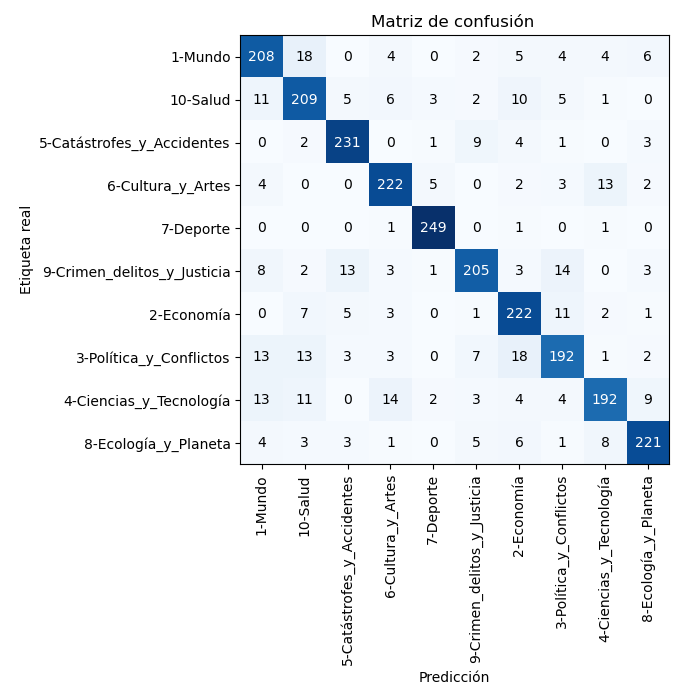

In [59]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plot_confusion_matrix(cm, labels=lbs)

In [50]:
def predict_class(model, sentence, min_len = 4):

    tokenized = tokenizer(sentence)
    
    if len(tokenized) < min_len:
        tokenized += ['<pad>'] * (min_len - len(tokenized))
    device = 'cpu'
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(0)
    preds = model(tensor)
    print(preds)
    max_preds = preds.argmax(dim = 1)
    return max_preds.item()

In [51]:
noticia = """Sin embargo, estos experimentos se llevaban a cabo en secreto, y cuando otras secciones de Guardian se dieron cuenta, el proyecto se canceló de inmediato."""
cat_map.get(predict_class(best_model, noticia))

[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


tensor([[ 0.0063, -0.0354, -0.2026,  0.2173, -0.1998, -0.1705, -0.0837,  0.1150,
          0.1501, -0.1367]], grad_fn=<AddmmBackward0>)


'6-Cultura_y_Artes'

In [52]:
cat_map.get(predict_class(best_model, "alexis y la copa america le pegoOoOooO"))

tensor([[-0.2340, -0.4520, -2.2400,  1.2007,  2.5506, -1.9241, -0.1091, -0.9972,
          0.8349, -1.1669]], grad_fn=<AddmmBackward0>)


'7-Deporte'

In [53]:
noticia = """Artistas mexicanos retoman los espacios públicos a través de la danza. Más de 120 artistas de 16 estados de México se reúnen para dar vida al Encuentro Nacional de Danza 2021. El evento cultural se lleva a cabo en distintos puntos de la capital del país, entre ellos el Complejo Cultural Los Pinos.
"""
cat_map.get(predict_class(best_model, noticia))

tensor([[-1.8258, -1.6885, -2.6427,  5.9611, -2.5693, -2.6762, -1.4923, -1.5334,
          0.0179, -1.9997]], grad_fn=<AddmmBackward0>)


'6-Cultura_y_Artes'

# Comparar hiperparametros

gaurdar parametros utilizados y algunas metricas en tabla resumen

In [54]:
wanted_keys = ['test_loss', 'test_acc', 'best_valid_loss', 'LR', 'ds_name', 'MAX_LEN', 'DROPOUT', 
               'N_EPOCHS', 'best_epoch', 'dt', 'TOKENIZER', 'DEVICE_NAME', 'MAX_VOCAB_SIZE',
               'RANDOM_STATE', 'BATCH_SIZE', 'EMBEDDING_DIM', 'N_FILTERS', 'FILTER_SIZES',
               'OPTIMIZER', 'CRITERION', 'FREEZE_EMBEDDINGS',
              ]

In [55]:
from operator import itemgetter
wanted_values = list(itemgetter(*wanted_keys)(globals()))
hparams = dict(zip(wanted_keys, wanted_values))
saved = False
hparams

{'test_loss': 0.47129129141103476,
 'test_acc': 0.8546316966414451,
 'best_valid_loss': 0.4578835460357368,
 'LR': 0.0005,
 'ds_name': 'ds_semibalanced_1678_rs5150.csv',
 'MAX_LEN': 1400,
 'DROPOUT': 0.65,
 'N_EPOCHS': 15,
 'best_epoch': 8,
 'dt': '2021-12-13_18:27:38.301156',
 'TOKENIZER': 'tokenize_es_c',
 'DEVICE_NAME': 'cuda',
 'MAX_VOCAB_SIZE': 50000,
 'RANDOM_STATE': 8008,
 'BATCH_SIZE': 64,
 'EMBEDDING_DIM': 300,
 'N_FILTERS': 100,
 'FILTER_SIZES': [3, 4, 5],
 'OPTIMIZER': 'Adam',
 'CRITERION': 'CrossEntropyLoss',
 'FREEZE_EMBEDDINGS': True}

In [56]:
import pickle
try:
    with open ('./cnn_info', 'rb') as fp:
        attemps = pickle.load(fp)
    if not saved:
        attemps.append(hparams)
        saved = True
except FileNotFoundError:
    print('cnn_info not found...')
    attemps = [hparams]
finally:
    with open('./cnn_info', 'wb') as fp:
        pickle.dump(attemps, fp)

In [61]:
pd.DataFrame(attemps[-10:], columns=wanted_keys[:4]+['TOKENIZER', 'MAX_LEN', 'ds_name'])

,test_loss,test_acc,best_valid_loss,LR,TOKENIZER,MAX_LEN,ds_name
0,0.568247,0.818934,0.571014,0.0005,tokenize_es_d,1400,ds_balanced_1430_rs8008.csv
1,0.577232,0.808503,0.579273,0.0005,tokenize_es_d,1400,ds_balanced_1430_rs8008.csv
2,0.514868,0.845238,0.487474,0.0005,tokenize_es_d,1600,ds_semibalanced_1678_rs5150.csv
3,0.555179,0.832738,0.522545,0.0005,tokenize_es_d,1200,ds_semibalanced_1678_rs5150.csv
4,0.496437,0.844885,0.470937,0.0005,tokenize_es_a,1200,ds_semibalanced_1678_rs5150.csv
5,0.505194,0.847600,0.484659,0.0005,tokenize_es_b,1200,ds_semibalanced_1678_rs5150.csv
6,0.477148,0.847972,0.478755,0.0005,tokenize_es_c,1200,ds_semibalanced_1678_rs5150.csv
7,0.471291,0.854632,0.457884,0.0005,tokenize_es_c,1400,ds_semibalanced_1678_rs5150.csv
8,0.508087,0.838834,0.513970,0.0005,tokenize_es_c,1400,ds_balanced_1430_rs8008.csv
9,0.471291,0.854632,0.457884,0.0005,tokenize_es_c,1400,ds_semibalanced_1678_rs5150.csv


In [58]:
freno()

NameError: name 'freno' is not defined

In [ ]:
wanted_keys = ['test_loss', 'test_acc', 'best_valid_loss', 'LR', 'ds_name', 'MAX_LEN', 'DROPOUT', 
               'N_EPOCHS', 'best_epoch', 'dt', 'DEVICE_NAME', 'MAX_VOCAB_SIZE',
               'RANDOM_STATE', 'BATCH_SIZE', 'EMBEDDING_DIM', 'N_FILTERS', 'FILTER_SIZES',
               'OPTIMIZER', 'CRITERION', 'FREEZE_EMBEDDINGS',
              ]

In [ ]:
import pickle
import pandas as pd
with open ('./cnn_info', 'rb') as fp:
    attemps = pickle.load(fp)
pd.DataFrame(attemps[-9:], columns=wanted_keys)